In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from utils.pluto_utils import PlutoData
# import utils.pluto_utils as pluto

# Output_Dir

In [2]:
output_dir = "/home/yangelaxue/Documents/VUW/pluto_runs/HD/Blast/"

In [3]:
data = PlutoData(output_dir)

In [4]:
X, Y = data.load_domain_from_HDF5()
rho = data.load_data_from_HDF5('rho')

In [5]:
vx1 = data.load_data_from_HDF5('vx1')
vx2 = data.load_data_from_HDF5('vx2')
if data.ndim==3:
    vx3 = data.load_data_from_HDF5('vx3')

if data.ndim==2:
    v = [(_vx1**2 + _vx2**2)**.5 for _vx1,_vx2 in zip(vx1,vx2)]
elif data.ndim>2:
    v = [(_vx1**2 + _vx2**2 + _vx3**2)**.5 for _vx1,_vx2_vx3 in zip(vx1,vx2,vx3)]

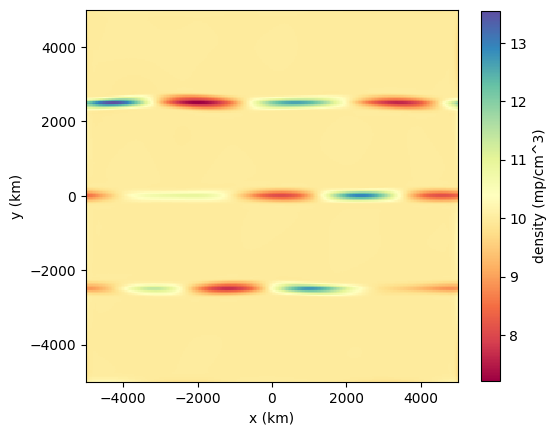

In [6]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect('equal')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')

im = ax.pcolormesh(X/1e5, Y/1e5, rho[-1]/data.Units.CONST_mp,cmap='Spectral')

fig.colorbar(im,shrink=.8,label='density (mp/cm^3)')

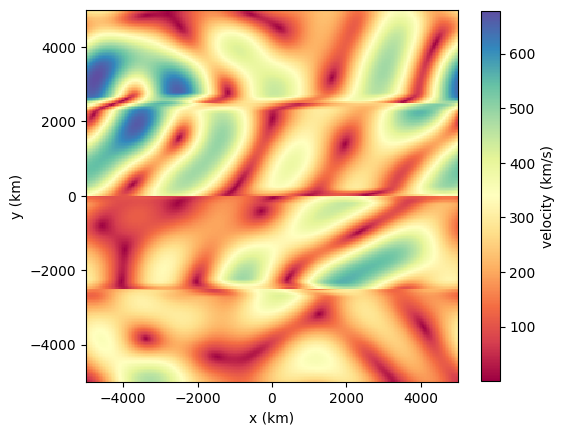

In [7]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect('equal')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')

im = ax.pcolormesh(X/1e5, Y/1e5, v[-1]/1e5,cmap='Spectral')

fig.colorbar(im,shrink=.8,label='velocity (km/s)')